In [1]:
!pip install -U sentence-transformers

In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')


In [3]:
import pandas as pd
import csv
from itertools import chain

testset_bicleaner=pd.read_csv("/home/bernadeta/BA_code/data/02-preprocessed/bicleaner_cleaned/bicleaner_source_train.txt", sep='\n', quoting=csv.QUOTE_NONE)

sentences_listoflist=testset_bicleaner.values.tolist()
sentences= list(chain.from_iterable(sentences_listoflist))

sentence_embeddings=model.encode(sentences, batch_size=64, show_progress_bar=True)

Batches:   0%|          | 0/8907 [00:00<?, ?it/s]

In [5]:
print(sentence_embeddings[:2], len(sentence_embeddings))

import pickle
with open('sentence_embeddings.pkl', 'wb') as f:
    pickle.dump(sentence_embeddings, f)

[[-2.50112545e-03 -9.30349901e-03 -2.42903624e-02  1.35165202e-02
  -9.86468941e-02  1.15080006e-01 -7.34016970e-02 -3.71996202e-02
  -1.50753751e-01 -4.35021184e-02  1.10200956e-01 -1.33347452e-01
   2.29265168e-02 -1.06201833e-02  8.31587493e-01 -3.36223602e-01
   7.13230491e-01 -6.75193846e-01 -6.00558110e-02  1.75572067e-01
  -1.76263899e-01  1.87634043e-02 -1.10059701e-01  8.52897018e-03
   5.55045940e-02 -2.11286515e-01  1.10582829e-01  7.57468417e-02
  -2.99782544e-01  1.26440346e-01 -2.07524702e-01  5.33009112e-01
  -3.30755174e-01 -4.80023399e-02  1.44440651e-01  2.25942820e-01
   6.69140369e-02  1.24980927e-01  1.91645727e-01 -1.99596416e-02
  -1.67346716e-01 -2.40055591e-01 -1.74210787e-01  1.82501972e-01
   7.68375024e-02  5.62815070e-02  1.06917024e-02 -2.89700478e-01
  -2.62660980e-01  3.85207623e-01 -7.51449391e-02 -1.79739416e-01
   7.69826537e-03 -1.65245593e-01 -2.49656662e-01 -9.97160003e-02
  -7.76613653e-02  1.98936805e-01  5.94195090e-02  1.70745760e-01
  -2.70802

In [6]:
data= pd.DataFrame(zip(sentences, sentence_embeddings), columns=['sentence','sentence_embedding'])

In [7]:
data

,sentence,sentence_embedding
0,for Question Time at the part-session in May 2007,"[-0.0025011254, -0.009303499, -0.024290362, 0...."
1,pursuant to Rule 109 of the Rules of Procedure,"[-0.274247, 0.7519402, -0.1077361, -0.07395364..."
2,by,"[-0.05152601, 0.32154033, 0.026105613, 0.14361..."
3,to the Council,"[0.2323679, 0.26495957, -0.2296985, 0.10313475..."
4,Subject: More active EU involvement in settlin...,"[0.06812121, 0.1685849, -0.22865295, 0.0938239..."
...,...,...
570028,Calls on the Commission and the Member States ...,"[0.049465988, -0.2421714, -0.024475748, -0.171..."
570029,"""Calls on the Commission, in its forthcoming c...","[-0.005134887, 0.13480403, -0.2842389, -0.3380..."
570030,Calls on the Commission to take into considera...,"[-0.1379213, 0.104386955, -0.13505286, 0.01643..."
570031,"""Instructs its President to forward this decla...","[-0.23190771, -0.030597443, -0.32953575, -0.24..."


In [13]:
import time 
import csv
from sentence_transformers import SentenceTransformer, util


print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 25 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(data['sentence_embedding'].tolist(), min_community_size=10, threshold=0.65)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", sentences[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", sentences[sentence_id])


Start clustering


RuntimeError: [enforce fail at CPUAllocator.cpp:71] . DefaultCPUAllocator: can't allocate memory: you tried to allocate 1299750484356 bytes. Error code 12 (Cannot allocate memory)

In [8]:
from sklearn.manifold import TSNE
m=TSNE(learning_rate=50)


In [12]:
#data['2d_embeddings']=m.fit_transform(data['sentence_embedding'])
#data.head()

#or:
data['2d_embeddings']=data['sentence_embedding'].apply(m.fit_transform(data['sentence_embedding']))


ValueError: setting an array element with a sequence.

In [17]:
testset_bicleaner['x']=tsne_features[:,0]
testset_bicleaner['y']=tsne_features[:,1]

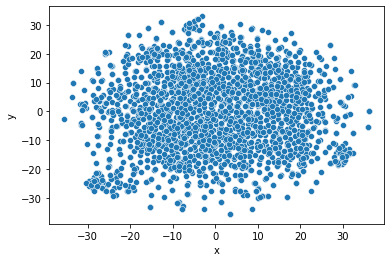

In [20]:
#!pip install seaborn
from matplotlib import pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.scatterplot(x="x", y="y", data=testset_bicleaner)
plt.show()

In [40]:
print(len(clusters))
print(sentences[612])

4
"Highlights the fact that school programmes and lifelong learning play an important role in the integration process by developing skills, notably language skills; considers, too, that barrier-free participation in training programmes and lifelong learning should be a right and an opportunity for newly-arrived immigrants;"


In [ ]:
#t-SNE to reduce dimension of sentence_embeddings
